In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [240]:
# Считываем excel файл и загружаем его в датафрейм
df = pd.read_excel('Кредитные продукты.xlsx')

# Фильтруем строчки только с нужным статусом
df = df[df['Статус'].isin(['Выдан', 'Одобрен'])]
df

,ID заявки,Продукт,Дата заявки,"Срок кредита, мес",Ставка,Запрошенная сумма,Статус
6,7,Рефинансирование,2020-09-07,48,0.29,523000,Одобрен
8,9,Кредитная карта,2020-09-09,13,0.19,72000,Выдан
9,10,Кредитная карта,2020-09-10,13,0.29,126000,Выдан
11,12,Кредитная карта,2020-09-12,13,0.19,43000,Одобрен
13,14,Кредитная карта,2020-09-14,13,0.29,48000,Одобрен
...,...,...,...,...,...,...,...
791,792,Кредитная карта,2021-09-08,12,0.19,25000,Одобрен
793,794,Рефинансирование,2021-09-10,48,0.29,2500000,Выдан
794,795,Ипотека,2021-09-11,240,0.04,4800000,Одобрен
797,798,Кредит наличными,2021-09-14,36,0.34,415000,Одобрен


In [241]:
# Функция для подсчета доходности продуктов
def profitability(months, yearly_loan_rate_percent, loan_sum):
    monthly_rate = yearly_loan_rate_percent / 12
    K = (monthly_rate * (1 + monthly_rate) ** months) / ((1 + monthly_rate) ** months - 1)
    total_sum = round(loan_sum * K * months)
    return total_sum - loan_sum

In [242]:
# Создаем новый столбец с доходностью продуктов с помощью функции profitability
df['Доходность'] = df.apply(lambda row: profitability(row['Срок кредита, мес'], row['Ставка'], row['Запрошенная сумма']), axis=1)
df

,ID заявки,Продукт,Дата заявки,"Срок кредита, мес",Ставка,Запрошенная сумма,Статус,Доходность
6,7,Рефинансирование,2020-09-07,48,0.29,523000,Одобрен,366352
8,9,Кредитная карта,2020-09-09,13,0.19,72000,Выдан,8231
9,10,Кредитная карта,2020-09-10,13,0.29,126000,Выдан,22331
11,12,Кредитная карта,2020-09-12,13,0.19,43000,Одобрен,4915
13,14,Кредитная карта,2020-09-14,13,0.29,48000,Одобрен,8507
...,...,...,...,...,...,...,...,...
791,792,Кредитная карта,2021-09-08,12,0.19,25000,Одобрен,2647
793,794,Рефинансирование,2021-09-10,48,0.29,2500000,Выдан,1751206
794,795,Ипотека,2021-09-11,240,0.04,4800000,Одобрен,2180893
797,798,Кредит наличными,2021-09-14,36,0.34,415000,Одобрен,252398


In [243]:
# Считаем доходность отдельно по продуктам
df = df.loc[:, ['Продукт', 'Доходность']]
df.groupby('Продукт').sum()

,Доходность
Продукт,
Ипотека,134161092
Кредит наличными,30311998
Кредитная карта,2488794
Рефинансирование,85285900


In [244]:
# Считаем доходность по всем продуктам вместе
total_profitability = df['Доходность'].sum()
total_profitability

252247784

In [245]:
new_df = df.groupby('Продукт', as_index=False).sum()

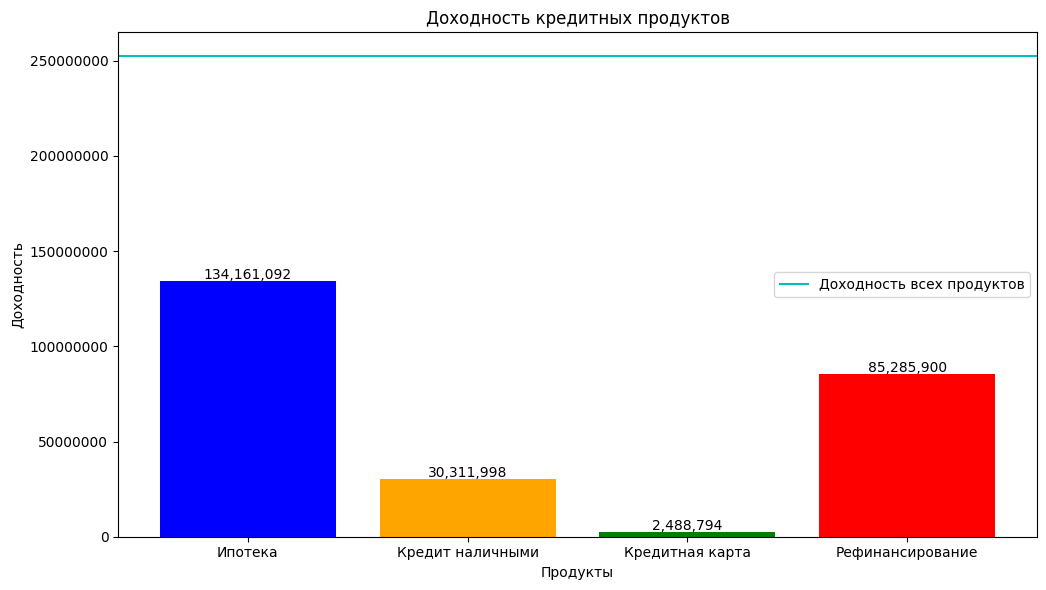

In [246]:
# Данные для осей
profitability_values = (df.groupby('Продукт').sum())['Доходность'].tolist()
products = new_df['Продукт'].tolist()

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(products, profitability_values, color=['blue', 'orange', 'green', 'red'])

# Добавление заголовка и меток осей
plt.title('Доходность кредитных продуктов')
plt.xlabel('Продукты')
plt.ylabel('Доходность')

# Добавление значений над столбцами
for i, value in enumerate(profitability_values):
    plt.text(i, value + 1e6, f'{value:,}', ha='center')
    
# Добавить значение общей доходности
plt.axhline(y = total_profitability, color = 'c', linestyle = '-')
plt.legend(['Доходность всех продуктов'])

# Показать график
plt.tight_layout()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [247]:
# Теперь создадим воронку продуктов по статусам
df_extra = pd.read_excel('Кредитные продукты.xlsx')
df_extra

,ID заявки,Продукт,Дата заявки,"Срок кредита, мес",Ставка,Запрошенная сумма,Статус
0,1,Кредит наличными,2020-09-01,60,0.29,500000,Отказ
1,2,Кредит наличными,2020-09-02,48,0.34,1200000,В обработке
2,3,Кредитная карта,2020-09-03,12,0.29,550000,Отказ
3,4,Рефинансирование,2020-09-04,84,0.25,225000,В обработке
4,5,Ипотека,2020-09-05,240,0.03,5000000,Отказ
...,...,...,...,...,...,...,...
795,796,Кредит наличными,2021-09-12,24,0.29,235000,Отказ
796,797,Кредит наличными,2021-09-13,72,0.19,345000,В обработке
797,798,Кредит наличными,2021-09-14,36,0.34,415000,Одобрен
798,799,Кредит наличными,2021-09-15,24,0.19,990000,Отказ


In [248]:
df_extra = df_extra.loc[:, ['ID заявки', 'Статус']]
df_extra.groupby('Статус').count()

,ID заявки
Статус,
В обработке,176
Выдан,136
Одобрен,192
Отказ,296


In [249]:
# В сумме получилось 800 id-шников заказов, сколько и было строк в таблице, значит ничего не потеряно
rows_total_number = len(df_extra.index)
rows_total_number

800

In [250]:
df_extra[df_extra['Статус'].isin(['В обработке', 'Одобрен', 'Выдан'])]
rows_total_number = len(df_extra.index)
issued_status_numbers = (df_extra.groupby('Статус').count())['ID заявки'].tolist()[:-1]
issued_status_numbers.insert(0, rows_total_number)

In [251]:
pio.renderers.default = 'iframe'
data = dict(
    applications = issued_status_numbers,
    status=['Всего заявок', 'В обработке', 'Одобрен', 'Выдан'])
fig = px.funnel(data, x='applications', y='status')
fig.update_layout(title_text='Воронка конверсии в выданные кредиты', title_x=0.5)
fig.show()

In [252]:
status_numbers = (df_extra.groupby('Статус').count())['ID заявки'].tolist()
status_numbers.insert(0, rows_total_number)
refused_status_numbers = status_numbers[0:2]
refused_status_numbers.append(status_numbers[-1])

In [253]:
data = dict(
    applications = refused_status_numbers,
    status=['Всего заявок', 'В обработке', 'Отказ'])
fig = px.funnel(data, x='applications', y='status')
fig.update_layout(title_text='Воронка конверсии в отказ от выдачи кредита', title_x=0.5)
fig.show()